# Supervised learning

- It's used when we want to predict an outcome from a given input, and we have examples of input–output pairs.
- Two main types: classification and regression.
- Classification: For a given input, predict class label from a set of possible labels.
    - binary classification (Email: spam or non-spam)
    - multi-class classification (Iris flower classification: setosa, virginica, versicolor)
- Regression: For a given input, predict a real number (given its size, predict a house's price)

## *k*-NN classifier

- Consider $k$ neighbors of a test data point. 
- If $k>1$, use voting to assign a label. 
- Figure: Guido&mueller, p. 36, showing the example for $k=3$.

**Model complexity for $k$-NN model**

- When $k$ small
  - The model makes predictions based on the nearest individual training data point. 
  - This leads to a very fine-grained decision boundary that can adapt closely to the training data, even capturing noise.
  - Each training point essentially has its own "influence zone," making the model highly flexible but prone to overfitting.

- When $k$ is large:
  - The model averages the influence of multiple neighbors to make predictions.
  - This results in a **smoother decision boundary** that is less sensitive to individual points, making the model more **generalized** and less prone to overfitting.


![alt text](images/threeNN.png)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

# plt.style.use("fivethirtyeight")
plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 100
font = {'family' : 'sans-serif',
        'size'   : 18}

mpl.rc('font', **font)

In [36]:
cancer = load_breast_cancer()
cancer;

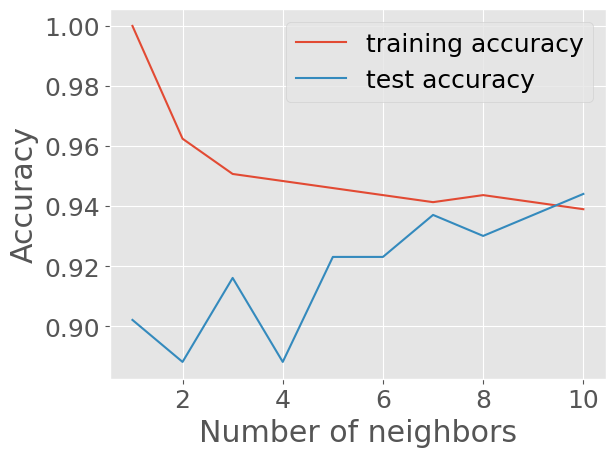

In [37]:
# code from Guido & Mueller

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target
)

# For the breast cancer dataset: cancer.target contains binary values (0 for malignant and 1 for benign). Suppose 62% of the samples are benign and 38% are malignant. Using `stratify=cancer.target` ensures that both the training and test sets maintain this same proportion of benign and malignant samples.

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
pass;
# note that this plot is a horizontally flipped version of the generalization error plot in 03-notebook.ipynb

## *k*NN regression

- Unlike *k*NN classification, where the output is a class label, *k*NN regression predicts a numerical value based on the average (or sometimes weighted average) of the target values of the $k$ nearest neighbors.

1. Choose the Number of Neighbors $k$
2. Find its $k$-nearest Neighbors (Eucledian distance is often used)
3. Compute the Predicted Value by taking the mean of the target values of the $k$-nearest neighbors.

- Simple
- **Non-parametric**: No assumptions about the underlying data distribution. Important!
- Works well with both linear and non-linear relationships.
- Computationally expensive

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^k y_i
$$

Another possibility: take weighted average where closer neighbors having more influence
$$
\hat{y} = \frac{\sum_{i=1}^k w_i y_i}{\sum_{i=1}^k w_i}, \quad w_i = \frac{1}{\text{distance to neighbor}_i}
$$


![](images/threeNNregression.png)



Mean-squared error ([Scikit documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error))

$$
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.
$$

$R^2$ score (**coefficient of determination**)

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Where:

Residual Sum of Squares

$$
  \text{SS}_{\text{res}} = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

$y_i$: Actual value, $\hat{y}_i$: Predicted value

Total Sum of Squares

$$
  \text{SS}_{\text{tot}} = \sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2
$$

Mean Squared Error: 5.854038551615032
R-squared: 0.9903039677369723


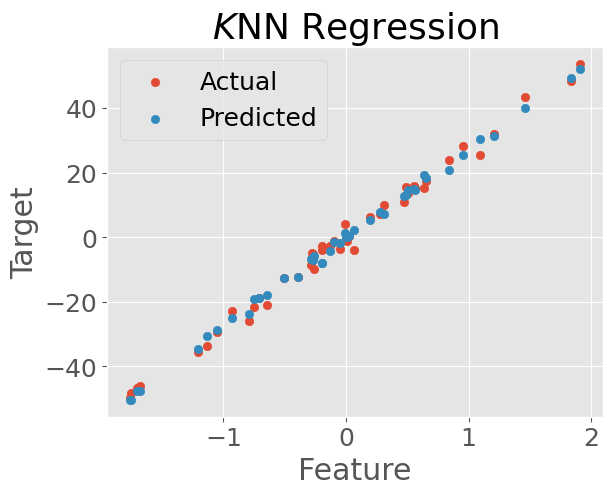

In [38]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Synthetic dataset
X, y = make_regression(n_samples=300, n_features=1, noise=2, random_state=7)
# X,y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=9
)

# training
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# predictions
y_pred = knn_regressor.predict(X_test)

# performance

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.title("$K$NN Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
pass;

## Linear regression

- Ordinary Linear  (OLS)
  
The simplest regression method. It finds the slope and the intercept by minimizing MSE between predictions and true target values in the training set. 


Slope = [29.53772937]
Intercept = -1.8461913570186357
Training set score: 0.69
Test set score = 0.6432286945616815
Mean Squared Error: 316.7233489158694
$R^2$= 0.6432286945616815


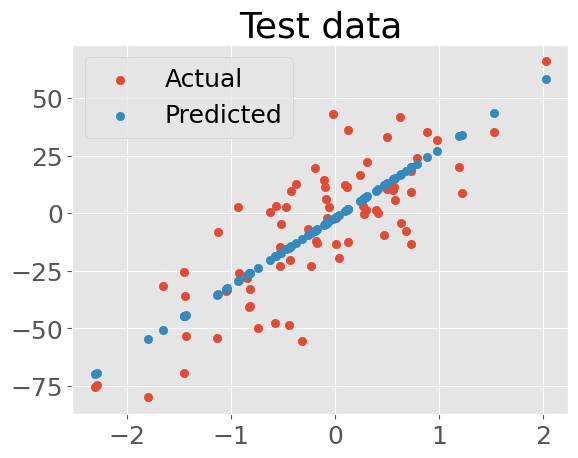

In [39]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Synthetic dataset
X, y = make_regression(n_samples=300, n_features=1, noise=20, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"Slope = {lr.coef_}", )
print(f"Intercept = {lr.intercept_}")

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print(f"Test set score = {lr.score(X_test, y_test)}")

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(r"$R^2$" f"= {r2_score(y_test, y_pred)}")

# plt.scatter(X_train,y_train)
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.title("Test data")
plt.legend()
pass;
# $R^2$ is low but both the training  and test sets have similar values. Possible underfitting (not overfitting).

## Let's now work with a more complicated diabetes data

In [40]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes.keys()
print(diabetes['DESCR'])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

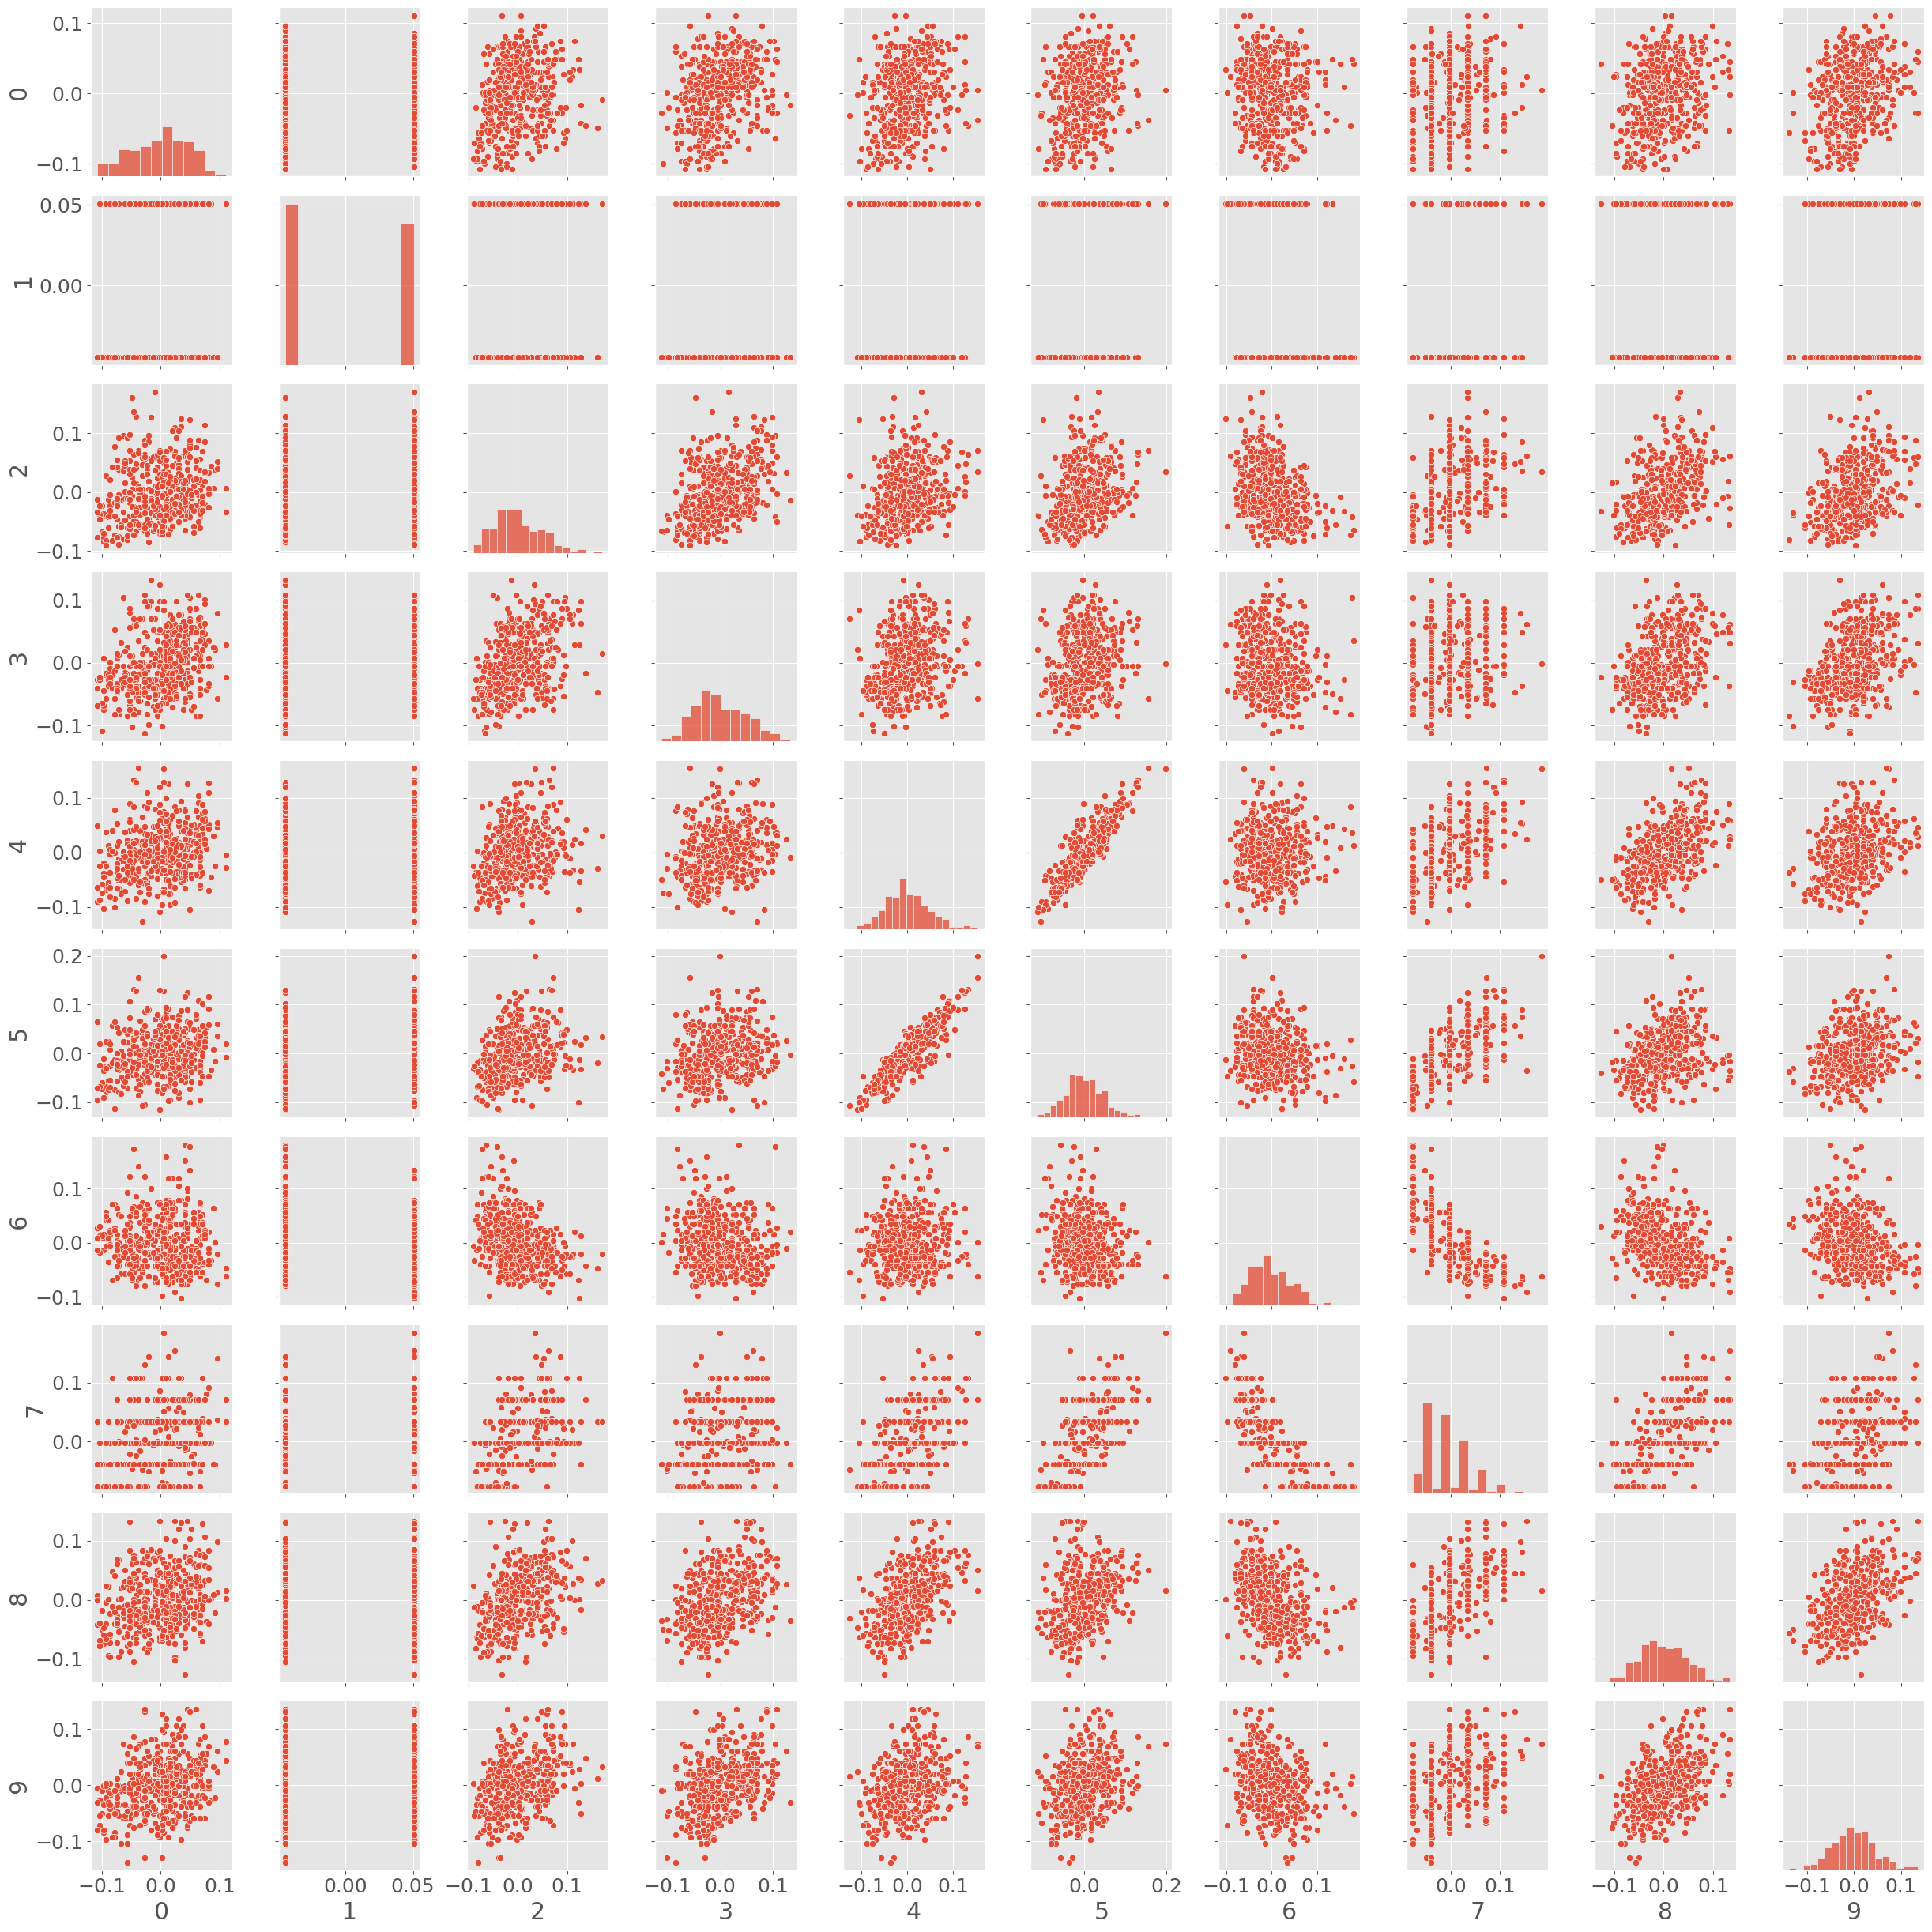

In [41]:
import seaborn as sns
import pandas as pd

# diabetes.target
# exploratory data analysis. please do it before trying any ML model
sns.pairplot(pd.DataFrame(diabetes.data)) # takes few seconds to run


In [42]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)

## Multiple linear regression

$$
\min_w \sum_{i=1}^{n} (y_i - X_i w)^2
$$

In [43]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"Coefficients = {lr.coef_}")
print(f"Intercept = {lr.intercept_}")

print(f"Training set r2 score = {lr.score(X_train, y_train):.2f}")
print(f"Test set r2 score = {lr.score(X_test, y_test):.2f}")

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
pass;


Coefficients = [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
Intercept = 153.06786205925664
Training set r2 score = 0.56
Test set r2 score = 0.36
Mean Squared Error: 3180.16


## Ridge regression

Linear regression with an **L2 regularization** term to prevent overfitting by penalizing large coefficients. It's useful when there are **many correlated features** in the dataset.

$$
\min_w \sum_{i=1}^{n} (y_i - X_i w)^2 + \alpha \sum_{j=1}^{D} w_j^2
$$

$\alpha$ is the regularization parameter (controls the strength of penalty). A higher $\alpha$ shrinks the coefficients towards zero, reducing model complexity. It **does not eliminate features**, though.


alpha=0.001, training score=0.56, test score = 0.36, Test MSE = 3183.96
alpha=0.01, training score=0.55, test score = 0.36, Test MSE = 3193.77
alpha=0.1, training score=0.55, test score = 0.37, Test MSE = 3132.42
alpha=1, training score=0.46, test score = 0.36, Test MSE = 3192.32
alpha=10, training score=0.17, test score = 0.14, Test MSE = 4252.86
alpha=100, training score=0.02, test score = 0.02, Test MSE = 4865.76


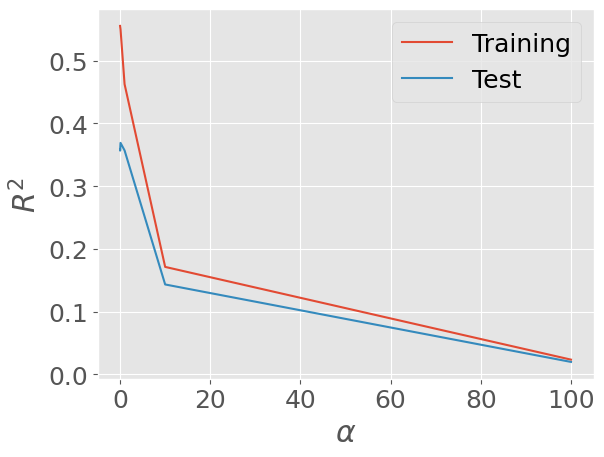

In [44]:
from sklearn.linear_model import Ridge

# alpha = 0 is OLS for Ridge

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

training_score = []
test_score = []
training_mse = []
test_mse = []

for val in alpha_values:
    ridge = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    train_score = ridge.score(X_train, y_train)
    tst_score = ridge.score(X_test, y_test)
    test_mse = mean_squared_error(y_test,y_pred)
    training_score.append(train_score)
    test_score.append(tst_score)
    print(
        f"alpha={val}, training score={train_score:.2f}, test score = {tst_score:.2f}, Test MSE = {test_mse:.2f}"
    )
plt.plot(alpha_values, training_score, label="Training")
plt.plot(alpha_values, test_score, label="Test")
plt.legend()
plt.ylabel('$R^2$')
plt.xlabel(r'$\alpha$')
pass;

## Lasso Regression

Linear regression that includes **L1 regularization** to reduce overfitting and perform **feature selection** by shrinking some coefficients to exactly **zero**. (unlike Ridge!)

$$
\min_w (1/2n)\sum_{i=1}^{n} (y_i - X_i w)^2 + \alpha \sum_{j=1}^{D} |w_j|
$$

**Works well when there are many features**, especially if only a few are important.

Lower $\alpha$ allows more non-zero coefficient


alpha=0.001, training score=0.56, test score = 0.36, Test MSE = 3183.39, Number of features = 10
alpha=0.01, training score=0.55, test score = 0.35, Test MSE = 3206.40, Number of features = 9
alpha=0.1, training score=0.55, test score = 0.36, Test MSE = 3202.02, Number of features = 7
alpha=1, training score=0.41, test score = 0.28, Test MSE = 3583.41, Number of features = 2
alpha=10, training score=0.00, test score = -0.00, Test MSE = 4965.13, Number of features = 0
alpha=100, training score=0.00, test score = -0.00, Test MSE = 4965.13, Number of features = 0


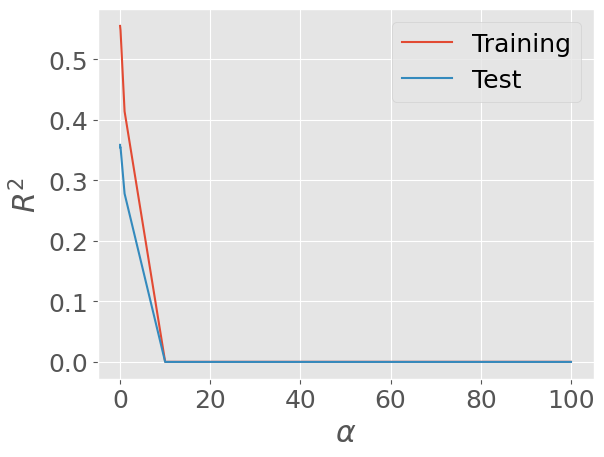

In [45]:
from sklearn.linear_model import Lasso

training_score = []
test_score = []
training_mse = []
test_mse = []

for val in alpha_values:
    lasso = Lasso(alpha=val, max_iter=100000).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    train_score = lasso.score(X_train, y_train)
    tst_score = lasso.score(X_test, y_test)
    test_mse = mean_squared_error(y_test,y_pred)
    training_score.append(train_score)
    test_score.append(tst_score)
    print(
        f"alpha={val}, training score={train_score:.2f}, test score = {tst_score:.2f}, Test MSE = {test_mse:.2f}, Number of features = {np.sum(lasso.coef_ != 0)}"
    )
plt.plot(alpha_values, training_score, label="Training")
plt.plot(alpha_values, test_score, label="Test")
plt.legend()
plt.ylabel('$R^2$')
plt.xlabel(r'$\alpha$')
pass;

## Rough guidelines
- First try ridge regression
- If you have a large amount of features and expect only a few of them to be  important, try Lasso.
- Also, use LASSO if you want an interpretable model.

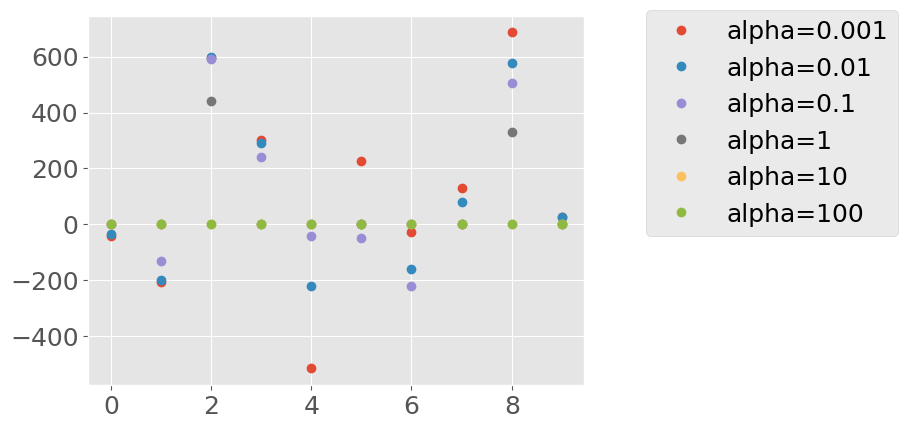

In [46]:
for val in alpha_values:
    lasso = Lasso(alpha=val, max_iter=100000).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    plt.plot(lasso.coef_, 'o', label=f"alpha={val}")
plt.legend(bbox_to_anchor=(1.1, 1.05))
pass;

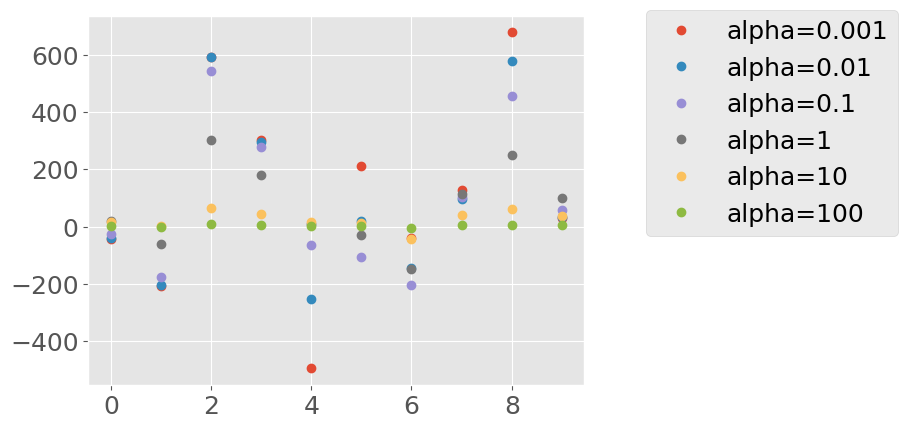

In [47]:
for val in alpha_values:
    ridge = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    plt.plot(ridge.coef_,'o', label=f"alpha={val}")
plt.legend(bbox_to_anchor=(1.1, 1.05))
pass;